<a href="https://colab.research.google.com/github/tuanlym/DOANII/blob/main/Train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install pyvi
!pip install pandas
!pip install numpy
!pip install gensim

     |████████████████████████████████| 8.5 MB 4.8 MB/s 
     |████████████████████████████████| 743 kB 51.7 MB/s 


In [ ]:
import gensim, re
import numpy as np
import pandas as pd
import pickle
from os import listdir

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import sys
import os

from keras.regularizers import l1
from keras.layers import Activation
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer
from gensim.parsing.preprocessing import strip_non_alphanum, strip_multiple_whitespaces,preprocess_string, split_alphanum, strip_short, strip_numeric


In [ ]:
!pip install matplotlib

In [ ]:
def clean_document(raw):
    raw = ViTokenizer.tokenize(raw)
    raw = strip_non_alphanum(raw).lower().strip()
    raw = split_alphanum(raw)
    raw = strip_short(raw, minsize=2)
    raw = strip_numeric(raw)
    tokens = raw.split()
    return tokens

In [ ]:
stop_word = ['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ', 'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng', 'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rằng', 'rất', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [ ]:
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stop_word:
            words.append(word)
    return ' '.join(words)
    return line

In [ ]:
clean_document("---Trường đại học, bách khoa hà nội")

['trường', 'đại_học', 'bách_khoa', 'hà_nội']

In [ ]:
with open('/content/drive/MyDrive/DOANII /train_sents.txt','r') as f:
  data = f.readlines()

In [ ]:

document = []
for d in data:
    document.append(d)


In [ ]:
sentences = []
for d in document:
  d = ViTokenizer.tokenize(d)
  d = remove_stopwords(d)
  sentences.append(clean_document(d))

In [ ]:
t = 923
print(sentences[t])
document[t]

['em', 'hi_vọng', 'trong', 'tiết', 'học', 'thầy', 'đi_sâu', 'kiến_thức', 'chuyên_môn', 'giảm', 'bớt', 'thời_lượng', 'hoạt_động', 'liên_hệ', 'thực_tế']


'em hi vọng trong các tiết học thầy có thể đi sâu vào kiến thức chuyên môn và giảm bớt thời lượng của hoạt động liên hệ thực tế .\n'

In [ ]:
with open('/content/drive/MyDrive/DOANII /train_sentiments.txt','r') as f:
  labels_data = f.readlines()
labelsdata = []
for line in labels_data:
  labelsdata.append(line.strip())
labelsdata

In [ ]:

labels = []
for i in range(0,len(labelsdata)):
  if labelsdata[i] == '0':
     labels.append((1,0,0))
  elif labelsdata[i] == '1':
     labels.append((0,1,0))
  else:
     labels.append((0,0,1))
labels = pd.get_dummies(labels)
labels

In [ ]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ')
tokenizer.fit_on_texts(sentences)
tokenizer.word_index

In [ ]:
inputs = tokenizer.texts_to_sequences(sentences)
inputs = pad_sequences(inputs)
inputs.shape

(11426, 66)

In [ ]:
x_train = np.array(inputs)
y_train = np.array(labels)

In [ ]:
word_model = gensim.models.Word2Vec(sentences, size=300, window = 10, min_count=1, iter=10)

In [ ]:
word_model.wv.save_word2vec_format('/content/vnw2v.txt', fvocab=None, binary=False)

In [ ]:
word_model.wv.most_similar("hấp_dẫn")

[('lôi_cuốn', 0.9939508438110352),
 ('sinh_động', 0.992962121963501),
 ('cute', 0.9908138513565063),
 ('thực_tại', 0.9906719326972961),
 ('dậy', 0.9905221462249756),
 ('gây_sự', 0.9891256093978882),
 ('súc_tích', 0.9891138076782227),
 ('mến', 0.9878492951393127),
 ('sâu_rộng', 0.9877545833587646),
 ('giảo', 0.9873903393745422)]

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.3, shuffle=True)

In [ ]:
# x_train = np.array(x_train)
# y_train = np.array(y_train)
# x_test = np.array(x_test)
# y_test = np.array(y_test)

In [ ]:

embedding_matrix = np.zeros((len(word_model.wv.vocab) + 1, 300))
for i, vec in enumerate(word_model.wv.vectors):
  embedding_matrix[i] = vec
model = Sequential()
model.add(Embedding(len(word_model.wv.vocab) +1,300,input_length=inputs.shape[1],weights=[embedding_matrix],trainable=False))
model.add(LSTM(300,return_sequences=False))
model.add(Dense(3,activation="softmax"))
model.summary()
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])
#model.add(Dropout(0.2))
batch = 64
epochs = 5
history = model.fit(x_train,y_train,batch,epochs,validation_split = 0.3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 74, 300)           1009200   
                                                                 
 lstm_1 (LSTM)               (None, 300)               721200    
                                                                 
 dense_1 (Dense)             (None, 3)                 903       
                                                                 
Total params: 1,731,303
Trainable params: 722,103
Non-trainable params: 1,009,200
_________________________________________________________________
Epoch 1/5
88/88 [==============================] - 56s 612ms/step - loss: 0.7252 - acc: 0.6652 - val_loss: 0.7031 - val_acc: 0.6562
Epoch 2/5
88/88 [==============================] - 53s 605ms/step - loss: 0.6604 - acc: 0.7074 - val_loss: 0.6226 - val_acc: 0.7088
Epoch 3/5
88/88 [=====================

In [ ]:
with open('/content/drive/MyDrive/DOANII /test_sents.txt','r') as f:
  test_data = f.readlines()
print(len(test_data))
test_document = []
for d in data:
    test_document.append(d)
test_sentences = []
for d in test_document:
  d = ViTokenizer.tokenize(d)
  d = remove_stopwords(d)
  test_sentences.append(clean_document(d))
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ')
tokenizer.fit_on_texts(test_sentences)
tokenizer.word_index
inputs_test = tokenizer.texts_to_sequences(test_sentences)
inputs_test = pad_sequences(inputs_test)
inputs_test.shape


3166


(3166, 47)

In [ ]:
with open('/content/drive/MyDrive/DOANII /test_sentiments.txt','r') as f:
  test_labels_data = f.readlines()
test_labelsdata = []
for line in test_labels_data:
  test_labelsdata.append(line.strip())
test_labelsdata
test_labels = []
for i in range(0,len(test_labelsdata)):
  if test_labelsdata[i] == '0':
     test_labels.append((1,0,0))
  elif test_labelsdata[i] == '1':
     test_labels.append((0,1,0))
  else:
     test_labels.append((0,0,1))
test_labels = pd.get_dummies(test_labels)
test_labels.shape

(3166, 3)

In [ ]:
x_test = np.array(inputs_test)
y_test = np.array(test_labels)

In [ ]:
valid = model.evaluate(x_test,y_test)

ValueError: ignored

In [ ]:
from matplotlib import pyplot

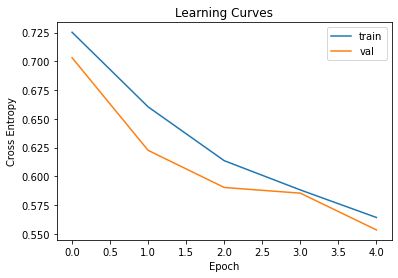

In [ ]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()